In [1]:
!pip install gurobipy
#only for google collab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
#libraries
import numpy as np
import pandas as pd
import gurobipy as gp
import seaborn as sns
import matplotlib.pyplot as plt

## Investing on different channels for marketing

### Parts 1,2 and 3

### Running the optimization using the RoI information from Consulting Company1

In [ ]:
# creating an empty gurobi model
adMod1=gp.Model()

In [ ]:
# uploading RoI data csv
from google.colab import files
uploaded = files.upload()

Saving ROI_data.csv to ROI_data (3).csv


,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


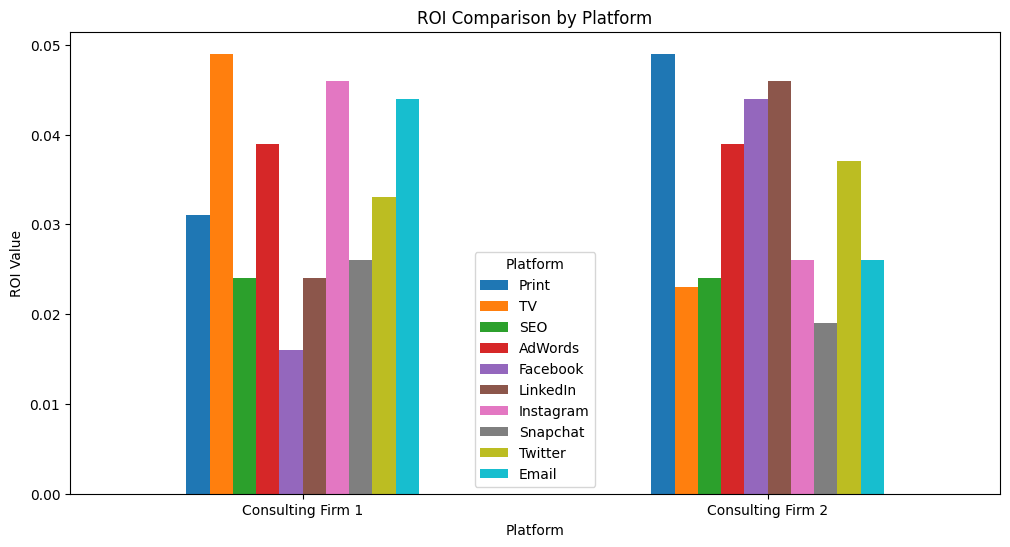

In [ ]:
# reading the RoI data from the csv file and storing it into C1
C1 = pd.read_csv('ROI_data.csv')
display(C1)

# Create a bar plot
ax = C1.plot(kind='bar', figsize=(12, 6))
plt.title("ROI Comparison by Platform")
plt.ylabel("ROI Value")
plt.xlabel("Platform")

# Set custom x-axis labels
ax.set_xticklabels(["Consulting Firm 1", "Consulting Firm 2"], rotation=0)

# Show the plot
plt.legend(title="Platform")
plt.show()

In [ ]:
# initializing investment to be 10M dollars
investment=10

# accessing the first row of data from the csv file, RoI data from consulting firm 1
i=0

# Assuming the first row contains the ROI data and the second row is for the Second Firm's ROI Estimate
roi_data1 = C1.iloc[i]
roi_data1 = roi_data1[1:]

# initializing a Gurobi model
adMod1 = gp.Model()

# creating a dictionary to hold decision variables
adModX1 = {}

# creating decision variables and adding them to the dictionary dynamically
for platform, roi_percentage in roi_data1.items():
    variable_name = f"{platform}_Var"
    adModX1[platform] = adMod1.addVar(vtype=gp.GRB.CONTINUOUS, name=variable_name)

# setting the objective function
adMod1.setObjective(gp.quicksum(roi_data1[platform] * adModX1[platform] for platform in roi_data1.index), sense=gp.GRB.MAXIMIZE)

In [ ]:
# initializing the number of constraints
conlist1=[0]*3

# Budget constraint: Total budget allocated for each channel <= 10M
conlist1[0] = adMod1.addConstr(gp.quicksum(adModX1[platform] for platform in roi_data1.index) <= investment)

# print + TV <= Facebook+Email -> (Facebook+Email) - (Print+TV) >= 0
conlist1[1] = adMod1.addConstr(adModX1['Facebook'] + adModX1['Email'] >= adModX1['Print'] + adModX1['TV'])
conlist1[2] = adMod1.addConstr(adModX1['Facebook'] + adModX1['LinkedIn'] + adModX1['Instagram'] + adModX1['Snapchat'] + adModX1['Twitter'] >= 2 * (adModX1['SEO'] + adModX1['AdWords']))

# Social media >= 2(SEO+AdWords) -> Social media - 2(SEO+AdWords) >= 0
for platform, variable in adModX1.items():
    conlist1.append(adMod1.addConstr(variable <= 3))

In [ ]:
# Running the model using these constraints and printing the final RoI and the allocation for each channel
adMod1.Params.OutputFlag = 0
adMod1.optimize()


print("Optimal maximum RoI:",round(adMod1.objVal,3))
print("Allocation of budget on channels:",adMod1.x)

Optimal maximum RoI: 0.456
Allocation of budget on channels: [0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0]


This model tells us that the RoI will be 0.456 of a million dollars, which is $456,000, given that we invest money in the following channels:
   1. Print - 0 dollars
   2. TV - 3M dollars
   3. SEO - 0 dollars
   4. AdWords - 1M dollars
   5. Facebook - 0 dollars
   6. LinkedIn - 0 dollars
   7. Instagram - 3M dollars
   8. Snapchat - 0 dollars
   9. Twitter - 0 dollars
   10. Email - 3M dollars

### Part 4

### Running the optimization using the RoI information from Consulting Company2

In [ ]:
# creating an empty gurobi model
adMod2=gp.Model()

In [ ]:
# initializing investment to be 10M dollars
investment=10

# accessing the first row of data from the csv file, RoI data from consulting firm 2
i=1

# Assuming the first row contains the ROI data and the second row is for the Second Firm's ROI Estimate
roi_data2 = C1.iloc[i]
roi_data2 = roi_data2[1:]
#print(roi_data2)

# creating a dictionary to hold decision variables
adModX2 = {}

# creating decision variables and adding them to the dictionary dynamically
for platform, roi_percentage in roi_data2.items():
    variable_name = f"{platform}_Var"
    adModX2[platform] = adMod2.addVar(vtype=gp.GRB.CONTINUOUS, name=variable_name)

# setting the objective function
adMod2.setObjective(gp.quicksum(roi_data2[platform] * adModX2[platform] for platform in roi_data2.index), sense=gp.GRB.MAXIMIZE)

In [ ]:
# initializing the number of constraints
conlist2=[0]*3

# Budget constraint: Total budget allocated for each channel <= 10M
conlist2[0] = adMod2.addConstr(gp.quicksum(adModX2[platform] for platform in roi_data2.index) <= investment)

# print+Tv <= Facebook+Email -> (Facebook+Email) - (Print+TV) >= 0
conlist2[1] = adMod2.addConstr(adModX2['Facebook'] + adModX2['Email'] >= adModX2['Print'] + adModX2['TV'])

# Social media >= 2(SEO+AdWords) -> Social media - 2(SEO+AdWords) >= 0
conlist2[2] = adMod2.addConstr(adModX2['Facebook'] + adModX2['LinkedIn'] + adModX2['Instagram'] + adModX2['Snapchat'] + adModX2['Twitter'] >= 2 * (adModX2['SEO'] + adModX2['AdWords']))

# Constraints to ensure each variable <= 3
for platform, variable in adModX2.items():
    conlist2.append(adMod2.addConstr(variable <= 3))

In [ ]:
#running the model using these constraints and printing the final RoI and the allocation for each channel
adMod2.Params.OutputFlag = 0
adMod2.optimize()


print("Optimal maximum RoI:",round(adMod2.objVal,3))
print("Allocation of budget on channels:",adMod2.x)

Optimal maximum RoI: 0.456
Allocation of budget on channels: [3.0, 0.0, 0.0, 1.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0]


This model tells us that the RoI will be 0.456 of a million dollars, which is $456,000, given that we invest money in the following channels:
   1. Print - 3M dollars
   2. TV - 0 dollars
   3. SEO - 0 dollars
   4. AdWords - 1M dollars
   5. Facebook - 3M dollars
   6. LinkedIn - 3M dollars
   7. Instagram - 0 dollars
   8. Snapchat - 0 dollars
   9. Twitter - 0 dollars
   10. Email - 0 dollars

### Part 5

Considering first RoI as the optimal solution and allocating the results of the second RoI:

In [ ]:
# Getting the model from the solution got from RoI data from consulting firm 2
alloc2 = adMod2.getAttr("X")

# Allocating the money from first optimal solution into second RoI based model
roi1_alloc2 = sum(roi_data1[i] * alloc2[i] for i, coefficient in enumerate(roi_data1.tolist()))

print("RoI after allocating results of second allocation into the optimal solution:",roi1_alloc2)
print("Difference between optimal RoI and the second allocation based RoI:",round(adMod2.objVal-roi1_alloc2,3))

RoI after allocating results of second allocation into the optimal solution: 0.252
Difference between optimal RoI and the second allocation based RoI: 0.204


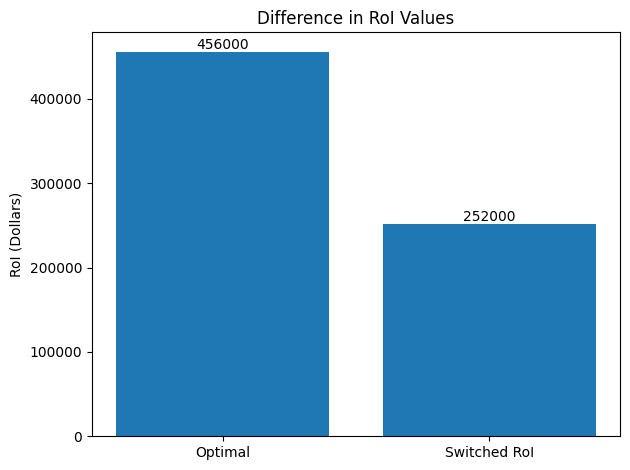

In [ ]:
# Sample data (replace with your actual data)
categories = ["Optimal", "Switched RoI"]
values = [adMod2.objVal*1000000, roi1_alloc2*1000000]  # Two values to plot
rounded_values = [round(value) for value in values]
# Create the bar chart with two bars
plt.bar(categories, values)

for i, v in enumerate(rounded_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Customize the chart
#plt.xlabel('Optimal RoI Values')
plt.ylabel('RoI (Dollars)')
plt.title('Difference in RoI Values')

# Show the plot
plt.tight_layout()
plt.show()

Considering second RoI as the optimal solution and allocating the results of the first RoI:

In [ ]:
# Getting the model from the solution got from RoI data from consulting firm 1
alloc1 = adMod1.getAttr("X")

# Allocating the money from second optimal solution into first RoI based model
roi2_alloc1 = sum(roi_data2[i] * alloc1[i] for i, coefficient in enumerate(roi_data2.tolist()))

print("RoI after allocating results of second allocation into the optimal solution:",roi2_alloc1)
print("Difference between optimal RoI and the second allocation based RoI:",round(adMod1.objVal-roi2_alloc1,3))

RoI after allocating results of second allocation into the optimal solution: 0.264
Difference between optimal RoI and the second allocation based RoI: 0.192


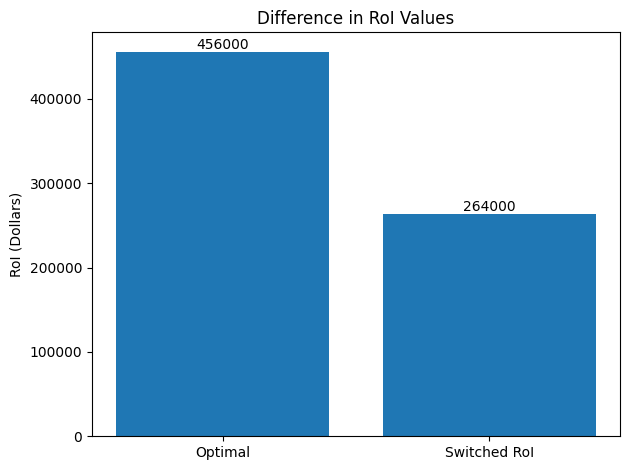

In [ ]:
# Sample data (replace with your actual data)
categories = ["Optimal", "Switched RoI"]
values = [adMod1.objVal*1000000, roi2_alloc1*1000000]  # Two values to plot
rounded_values = [round(value) for value in values]
# Create the bar chart with two bars
plt.bar(categories, values)

for i, v in enumerate(rounded_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Customize the chart
#plt.xlabel('Optimal RoI Values')
plt.ylabel('RoI (Dollars)')
plt.title('Difference in RoI Values')

# Show the plot
plt.tight_layout()
plt.show()

To see if the third constraint of keeping the allocation of each channel below 3 million is useful, we remove the constraint to see how the optimal solution and the allocation changes

In [ ]:
# creating an empty gurobi model
adMod3=gp.Model()

# initializing investment to be 10M dollars
investment=10

# creating a dictionary to hold decision variables
adModX3 = {}

# creating decision variables and adding them to the dictionary dynamically
for platform, roi_percentage in roi_data1.items():
    variable_name = f"{platform}_Var"
    adModX3[platform] = adMod3.addVar(vtype=gp.GRB.CONTINUOUS, name=variable_name)

# setting the objective function
adMod3.setObjective(gp.quicksum(roi_data1[platform] * adModX3[platform] for platform in roi_data1.index), sense=gp.GRB.MAXIMIZE)

# initializing the number of constraints
conlist1=[0]*3

# Budget constraint: Total budget allocated for each channel <= 10M
conlist1[0] = adMod3.addConstr(gp.quicksum(adModX3[platform] for platform in roi_data1.index) <= investment)

# print+Tv <= Facebook+Email -> (Facebook+Email) - (Print+TV) >= 0
conlist1[1] = adMod3.addConstr(adModX3['Facebook'] + adModX3['Email'] >= adModX3['Print'] + adModX3['TV'])

# Social media >= 2(SEO+AdWords) -> Social media - 2(SEO+AdWords) >= 0
conlist1[2] = adMod3.addConstr(adModX3['Facebook'] + adModX3['LinkedIn'] + adModX3['Instagram'] + adModX3['Snapchat'] + adModX3['Twitter'] >= 2 * (adModX3['SEO'] + adModX3['AdWords']))

# Removing the constraints of allocating <= 3M for each channel
# for platform, variable in adModX3.items():
    # conlist1.append(adMod3.addConstr(variable <= 3))


# running the model using these constraints and printing the final RoI and the allocation for each channel
adMod3.Params.OutputFlag = 0
adMod3.optimize()


print("Optimal maximum RoI:",round(adMod3.objVal,3))
print("Allocation of budget on channels:",adMod3.x)

Optimal maximum RoI: 0.465
Allocation of budget on channels: [0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0]


This model tells us that the RoI will be 0.465 of a million which is $465,000, given that we invest money in the following channels:
   1. Print - 0 dollars
   2. TV - 5M dollars
   3. SEO - 0 dollars
   4. AdWords - 0 dollars
   5. Facebook - 0 dollars
   6. LinkedIn - 0 dollars
   7. Instagram - 0 dollars
   8. Snapchat - 0 dollars
   9. Twitter - 0 dollars
   10. Email - 5M dollars

### Part 6

To see how much we could change each advertising medium’s ROI increases or decreases and still result in the same optimal allocation we found in Part 3, we look at the upper and lower bounds of the RoIs within which we can change those values to keep the optimal allocation the same:

In [ ]:
upper_bound=adMod1.SAObjUp
lower_bound=adMod1.SAObjLow
channels=C1.columns[1:]
#display(channels)
bounds=pd.DataFrame({'Lower Bounds':lower_bound,'Upper Bounds':upper_bound},index=channels)
display(bounds)

,Lower Bounds,Upper Bounds
Print,-inf,0.049
TV,0.039,0.062
SEO,-inf,0.039
AdWords,0.033,0.046
Facebook,-inf,0.029
LinkedIn,-inf,0.039
Instagram,0.039,inf
Snapchat,-inf,0.039
Twitter,-inf,0.039
Email,0.029,inf


### Part 7

Knowing that we can re-invest half of what we got the previous month, we re-calculate the investments, allocations and the returns we get each month:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving roi_mat.csv to roi_mat (1).csv


In [ ]:
# reading the RoI data from the csv file and storing it into C1
C2 = pd.read_csv('roi_mat.csv')
C2 = C2.rename(columns={'Unnamed: 0': 'Month'})
display(C2)

,Month,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [ ]:
# initializing investment to be 10M dollars
investment=10

# initializing lists to store the RoI, monthly investment and allocation for each channel for all months
roi=[]
investment_monthly=[]
allocation=[]

# looping over the months of the year
for i in range(len(C2)):
    roi_data1 = C2.iloc[i]
    roi_data1 = roi_data1[1:]
    roi_data1 = roi_data1*0.01

    # creating a model for each month
    adMod=gp.Model()

    # creating a dictionary to hold decision variables
    adModX = {}

    # creating decision variables and adding them to the dictionary dynamically
    for platform, roi_percentage in roi_data1.items():
        variable_name = f"{platform}_Var"
        adModX[platform] = adMod.addVar(vtype=gp.GRB.CONTINUOUS, name=variable_name)

    # setting the objective function
    adMod.setObjective(gp.quicksum(roi_data1[platform] * adModX[platform] for platform in roi_data1.index), sense=gp.GRB.MAXIMIZE)

    # initializing the number of constraints
    conlist1=[0]*3

    # Budget constraint: Total budget allocated for each channel <= 10M
    conlist1[0] = adMod.addConstr(gp.quicksum(adModX[platform] for platform in roi_data1.index) <= investment)

    # print+Tv <= Facebook+Email -> (Facebook+Email) - (Print+TV) >= 0
    conlist1[1] = adMod.addConstr(adModX['Facebook'] + adModX['Email'] >= adModX['Print'] + adModX['TV'])

    # Social media >= 2(SEO+AdWords) -> Social media - 2(SEO+AdWords) >= 0
    conlist1[2] = adMod.addConstr(adModX['Facebook'] + adModX['LinkedIn'] + adModX['Instagram'] + adModX['Snapchat'] + adModX['Twitter'] >= 2 * (adModX['SEO'] + adModX['AdWords']))

    # Constraints to ensure each variable <= 3
    for platform, variable in adModX.items():
        conlist1.append(adMod.addConstr(variable <= 3))

    # Running the model using these constraints and printing the final RoI and the allocation for each channel
    adMod.Params.OutputFlag = 0
    adMod.optimize()

    # Appending the RoI, allocation, monthly investments for each month
    roi.append(adMod.objVal)
    allocation.append(adMod.x)
    investment_monthly.append(investment)

    # Re-initializing the investment to 10M
    investment=10

    # Adding half of the RoI that we received the previous month
    investment=investment+(adMod.objVal*0.5)

months = C2['Month'].tolist()
columns = C2.columns[1:]
# creating a dataframe with the data we have for each month
roi_d = pd.DataFrame(roi, columns=['RoI Overall'], index=months)
alloc_d = pd.DataFrame(allocation, columns=columns, index=months)
invest_d = pd.DataFrame(investment_monthly, columns=['Monthly Investment'], index=months)

overall_df = alloc_d.merge(invest_d, left_index=True, right_index=True)
overall_df = overall_df.merge(roi_d, left_index=True, right_index=True)

overall_df = overall_df.reset_index()
display(overall_df)

,index,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Monthly Investment,RoI Overall
0,January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000,10.000000,0.373000
1,February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000,10.186500,0.406296
2,March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.203148,0.0,3.000000,0.000000,10.203148,0.407516
3,April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.203758,0.000000,10.203758,0.400335
4,May,1.200168,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000,10.200168,0.411006
5,June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.205503,3.000000,10.205503,0.423809
6,July,0.000000,0.000000,0.0,3.000000,1.211905,0.0,3.000000,0.0,3.000000,0.000000,10.211905,0.428264
7,August,2.714132,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000,10.214132,0.437994
8,September,0.609498,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.609498,10.218997,0.402712
9,October,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,0.000000,1.201356,10.201356,0.371443


### Part 8

To see if we have a stable budget allocation
 each month for each channel, we have to find the difference between the allocations for each channel between the months:

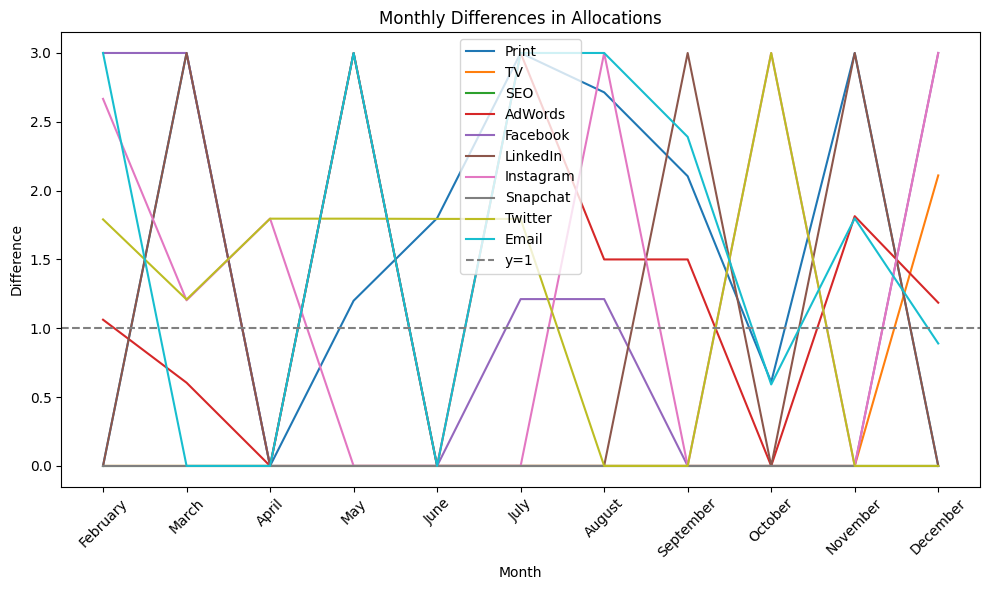

In [ ]:
df_diff = overall_df.iloc[:, 1:].diff().abs()
#display(df_diff)

# Get the absolute values of the differences in the DataFrame
df_modulus = df_diff.abs()
#display(df_modulus)

# Extract the columns you want to plot (excluding the 'Month' column)
columns_to_plot = df_modulus.columns[:-2]  # Exclude the 'Month' column

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Determine the months dynamically
months = overall_df['index'].tolist()

# Loop through the columns and plot each one, aligning data with months
for column in columns_to_plot:
    ax.plot(months, df_modulus[column].tolist(), label=column)  # Exclude the first month as there's no previous data

# Add a dotted line at y=1
ax.axhline(y=1, color='gray', linestyle='--', label='y=1')

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Difference')
ax.set_title('Monthly Differences in Allocations')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
2,3.000000,0.000000,0.0,0.604500,3.000000,3.0,1.203148,0.0,1.209000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.796852,0.0,1.796242,0.000000
4,1.200168,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,1.796242,3.000000
5,1.799832,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.794497,0.000000
6,3.000000,0.000000,0.0,3.000000,1.211905,0.0,0.000000,0.0,1.794497,3.000000
7,2.714132,0.000000,0.0,1.500000,1.211905,0.0,3.000000,0.0,0.000000,3.000000
8,2.104634,0.000000,0.0,1.500000,0.000000,3.0,0.000000,0.0,0.000000,2.390502
9,0.609498,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,0.591858
10,3.000000,0.000000,0.0,1.814278,0.000000,3.0,0.000000,0.0,0.000000,1.798644
11,0.000000,2.110404,0.0,1.185722,3.000000,0.0,3.000000,0.0,0.000000,0.889596


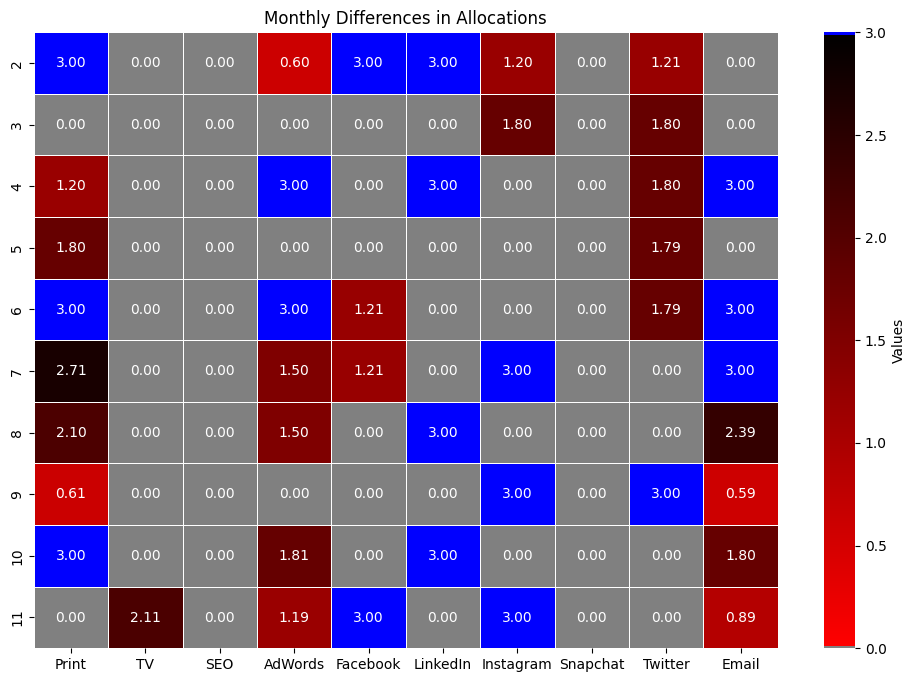

In [ ]:
import matplotlib.colors as mcolors

df_diff = overall_df.iloc[:, 1:].diff().abs()
#display(df_diff)

# Get the absolute values of the differences in the DataFrame
df_modulus = df_diff.abs()
df_modulus = df_modulus.iloc[2:]
df_modulus = df_modulus.iloc[:,:-2]
display(df_modulus)

# Define a function to create a custom colormap
def custom_colormap(value):
    if value == 0:
        return (0.5, 0.5, 0.5)  # Grey for 0s
    elif value < 1:
        return (1 - value, 0, 0)  # Red gradient for values below 1
    else:
        return (0, 0, value)  # Blue gradient for values above 1

# Create a colormap with the custom function
cmap = mcolors.LinearSegmentedColormap.from_list("custom", [custom_colormap(i) for i in np.linspace(0, 1, 256)], N=256)

# Plot the heatmap with customized coloring
plt.figure(figsize=(12, 8))
sns.heatmap(df_modulus, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, cbar_kws={'label': 'Values'})
plt.title("Monthly Differences in Allocations")
plt.show()

As we can see from this graph, assuming that the reds indicate a difference below 1 million and blues indicate a difference greater than 1 million, we can see that none of the reds sustained throughout the months, in turn saying that the allocation differences were below 1 million throughout the year, so we can say that there weren't any stable budgets in the allocations.

To make sure that the allocations are stable throughout, we can introduce a constraint that makes sure that we can increase or decrease the allocation for each channel only within a million for the next month.